In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df2 = pd.read_csv('olist_customers_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

cols = ['customer_id', 'order_id', 'order_purchase_timestamp']
orders = df1[cols]
orders =  orders.set_index('customer_id')
orders.drop_duplicates(inplace=True)

cols = ['order_id', 'payment_value']
payment = df3[cols]
payment = payment.set_index('order_id')
payment.drop_duplicates(inplace=True)

cols = ['customer_id', 'customer_unique_id']
customers = df2[cols]
customers = customers.set_index('customer_id')

elog=pd.concat([orders,customers], axis=1, join='inner')
elog.reset_index(inplace=True)

cols = ['customer_unique_id', 'order_purchase_timestamp']
elog = elog[cols]

elog['order_purchase_timestamp'] = pd.to_datetime(elog['order_purchase_timestamp'])
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog['order_date'] = pd.to_datetime(elog['order_date'])

cols = ['customer_unique_id', 'order_date']
elog = elog[cols]

elog.columns = ['CUSTOMER_ID', 'ORDER_DATE']

elog.info()
display(elog.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
CUSTOMER_ID    99441 non-null object
ORDER_DATE     99441 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ MB


,CUSTOMER_ID,ORDER_DATE
24851,56dd71743d522ff3e993fd5ece9840f9,2018-03-23
58119,0a5df23b922b9998bb7378f1ac03c98a,2017-09-29
28941,1ea65ddb35b66437e159550e6e239501,2017-11-20
82617,3366f554757da30446c5f0ba9f3c8e91,2018-04-16
52889,381865bb5f82d4d601fa3026a283b47e,2017-11-08


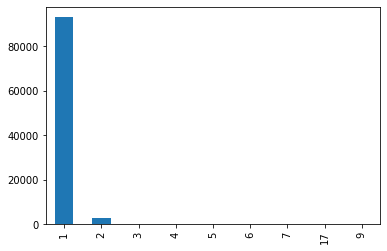

In [8]:
#customer_id value counts bar plot 
v = elog.CUSTOMER_ID.value_counts()
pd.value_counts(v).plot(kind="bar")

In [9]:
elog.CUSTOMER_ID.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
506e75b37532165adf8def1540e82f46     1
d20f34444ce44ca683d46e9da98456e1     1
b780d717ee630cb04f7a31a75841e10d     1
a47e9c4f145452422398b53fa614c043     1
13e287d3a441b8e6e77784338e3d926c     1
Name: CUSTOMER_ID, Length: 96096, dtype: int64

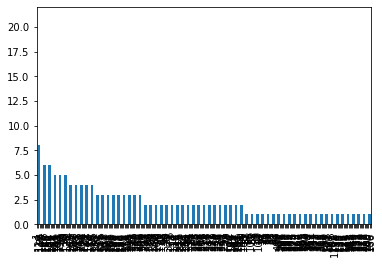

In [10]:
#order date value counts bar plot
o = elog.ORDER_DATE.value_counts()
pd.value_counts(o).plot(kind="bar")

In [11]:
elog.ORDER_DATE.value_counts()

2017-11-24    1176
2017-11-25     499
2017-11-27     403
2017-11-26     391
2017-11-28     380
              ... 
2016-10-02       1
2018-08-31       1
2016-09-05       1
2018-10-16       1
2018-10-03       1
Name: ORDER_DATE, Length: 634, dtype: int64

In [18]:
p = payment.aggregate(['sum', 'max'])

,payment_value
sum,7773585.14
max,13664.08


In [71]:
elog.describe()

,CUSTOMER_ID,ORDER_DATE
count,99441,99441
unique,96096,634
top,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11-24 00:00:00
freq,17,1176
first,NaN,2016-09-04 00:00:00
last,NaN,2018-10-17 00:00:00


In [34]:
first_merge = pd.merge(df1,df3, on = 'order_id')
cols = ['customer_id', 'order_id', 'order_purchase_timestamp', 'payment_value']
first_merge = first_merge[cols]

first_merge['order_purchase_timestamp'] = pd.to_datetime(first_merge['order_purchase_timestamp'])
first_merge['order_purchase_timestamp'] = first_merge.order_purchase_timestamp.dt.date
first_merge['order_purchase_timestamp'] = pd.to_datetime(first_merge['order_purchase_timestamp'])

first_merge.columns = ['Customer ID', 'Order ID', 'Order Date', 'Sales' ]

first_merge.info
display(first_merge.sample(5))

,Customer ID,Order ID,Order Date,Sales
58402,bf77f570c34b1a6960353879d4ba4414,47106d9b98c54756baa304fa0f9c36f0,2018-03-24,161.53
85612,b03183c784f431b0b4d56e94d9461427,eff815e07af90858dc1de0952b153b9d,2018-07-30,97.25
80207,a86314eff3e69dc24f43d56010778157,9ce40c402845819d3d1c88eb10a41e4a,2017-09-05,10.81
73018,f206315b02656d3adf91b65e35b7a70c,3437696fd6e7ed0db729224d21959bc9,2018-03-07,70.77
80463,3054e9226cf13ac6a363cd693d9fbfb6,a6cc4d40b53f7e99ea8ba03cd33ae60b,2018-04-25,175.08


In [9]:
first_merge.aggregate({"payment_value":['sum','max']})

,payment_value
sum,16008872.12
max,13664.08


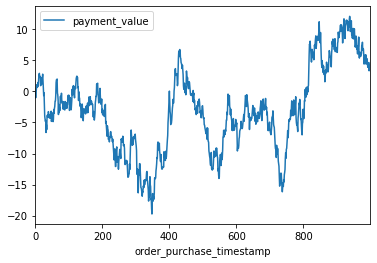

In [10]:
first_merge = pd.DataFrame(np.random.randn(1000, 2), columns=['payment_value', 'customer_id']).cumsum()

first_merge['order_purchase_timestamp'] = pd.Series(list(range(len(first_merge))))

first_merge.plot(x='order_purchase_timestamp', y='payment_value')


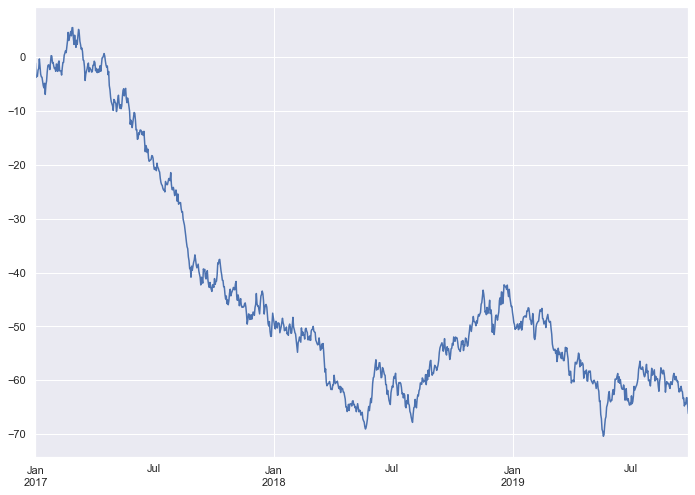

In [25]:
first_merge = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2017', periods=1000))

first_merge = first_merge.cumsum()

first_merge.plot()

In [33]:
first_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 4 columns):
Customer ID    103886 non-null object
Order ID       103886 non-null object
 Order Date    103886 non-null datetime64[ns]
Sales          103886 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.0+ MB


In [35]:
RFM = first_merge.groupby('Customer ID').agg({'Order Date': lambda y: (first_merge['Order Date'].max().date() - y.max().date()).days,
                                              'Order ID': lambda y: len(y.unique()),  
                                              'Sales': lambda y: round(y.sum(),2)})

RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM = RFM.sort_values('Monetary', ascending=False)
RFM.head() 

,Recency,Frequency,Monetary
Customer ID,,,
1617b1357756262bfa56ab541c47bc16,383,1,13664.08
ec5b2ba62e574342386871631fafd3fc,94,1,7274.88
c6e2731c5b391845f6800c97401a43a9,612,1,6929.31
f48d464a0baaea338cb25f816991ab1f,84,1,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,511,1,6726.66


In [38]:
RFM.describe()

,Recency,Frequency,Monetary
count,99440.000000,99440.0,99440.000000
mean,290.268212,1.0,160.990267
std,153.664106,0.0,221.951257
min,0.000000,1.0,0.000000
25%,166.000000,1.0,62.010000
50%,272.000000,1.0,105.290000
75%,400.000000,1.0,176.970000
max,773.000000,1.0,13664.080000
